<a href="https://colab.research.google.com/github/lekshanapriya2003/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load & Preprocess Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('Housing.csv')

## Dataset First View

In [ ]:
# Dataset First Look
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(545, 13)

## Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
# total null values presnt in the data
df.isnull().sum().sum()


np.int64(0)

### Understanding Variables

In [ ]:
# Dataset Columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# description of all the features.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()
for item in variables_df:
  print('The Unique Values of', item, 'are:', df[item].unique())

The Unique Values of price are: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000 

### **Data Wrangling**

In [ ]:
# handling null values.
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


### Select Features and Target

In [ ]:
# Numerical features
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Categorical features (need encoding)
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Combine
features = num_features + cat_features

In [ ]:
X = df[features]
y = df['price']

In [ ]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

### Train-Test Split

In [ ]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['price'], axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"""
    X_train.shape: {X_train.shape}
    X_test.shape: {X_test.shape}
    y_train.shape: {y_train.shape}
    y_test.shape: {y_test.shape}
""")


    X_train.shape: (436, 13)
    X_test.shape: (109, 13)
    y_train.shape: (436,)
    y_test.shape: (109,)



In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.to_list()

print(f"numerical_cols:\n {numerical_cols}\n")
print(f"categorical_cols:\n {categorical_cols}")

numerical_cols:
 ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

categorical_cols:
 ['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [ ]:
print(df[numerical_cols].describe())

               area    bedrooms   bathrooms     stories     parking
count    545.000000  545.000000  545.000000  545.000000  545.000000
mean    5150.541284    2.965138    1.286239    1.805505    0.693578
std     2170.141023    0.738064    0.502470    0.867492    0.861586
min     1650.000000    1.000000    1.000000    1.000000    0.000000
25%     3600.000000    2.000000    1.000000    1.000000    0.000000
50%     4600.000000    3.000000    1.000000    2.000000    0.000000
75%     6360.000000    3.000000    2.000000    2.000000    1.000000
max    16200.000000    6.000000    4.000000    4.000000    3.000000


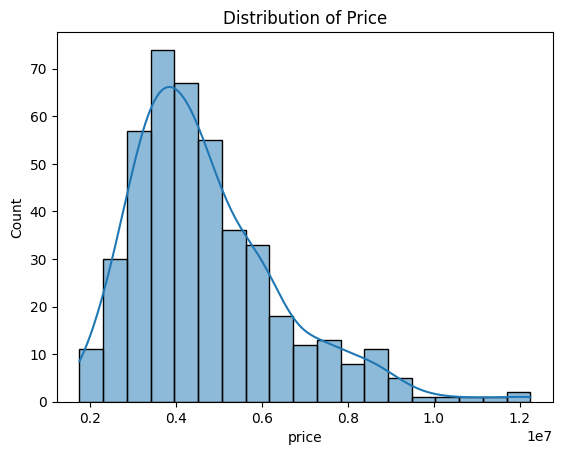

In [ ]:
sns.histplot(y_train, kde=True)
plt.title('Distribution of Price')
plt.show()

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

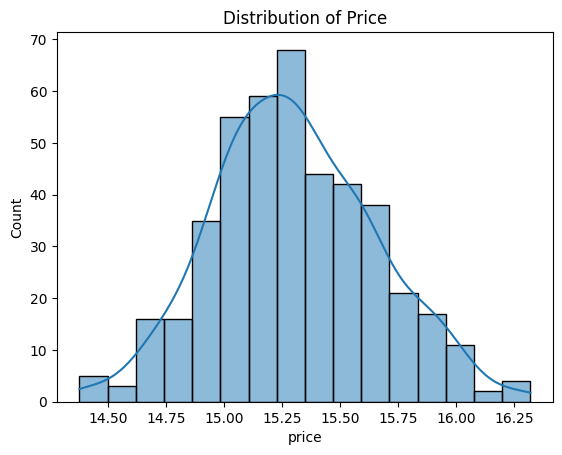

In [ ]:
sns.histplot(y_train, kde=True)
plt.title('Distribution of Price')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[[col for col in numerical_cols if col != 'price']])
X_test_scaled_num = scaler.transform(X_test[[col for col in numerical_cols if col != 'price']])

In [ ]:
X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numerical_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numerical_cols, index=X_test.index)

In [ ]:
X_train_final = pd.concat([X_train_scaled_num, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test[categorical_cols]], axis=1)

In [ ]:
X_test_final.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,0.338750,1.394055,1.539173,0.254215,0.367957,False,False,True,False,False,False,False,True
77,0.611257,0.055271,1.539173,1.420929,-0.803059,True,False,False,False,True,True,False,False
360,-0.506019,-1.283514,-0.557950,-0.912499,-0.803059,True,False,False,False,False,False,True,False
90,-0.070009,0.055271,-0.557950,0.254215,-0.803059,True,False,False,False,True,False,True,False
493,-0.542353,0.055271,-0.557950,-0.912499,-0.803059,True,False,False,False,False,False,False,False


### Prediction

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [ ]:
y_pred_log = model.predict(X_test_final)

In [ ]:
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

### Accuracy

In [ ]:
mae = mean_absolute_error(y_test, y_pred_actual)
mse = mean_squared_error(y_test, y_pred_actual)
r2 = r2_score(y_test, y_pred_actual)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 4758525.554123146
MSE: 25258585865262.14
R2 Score: -130813421910332.56


### Visualize Results

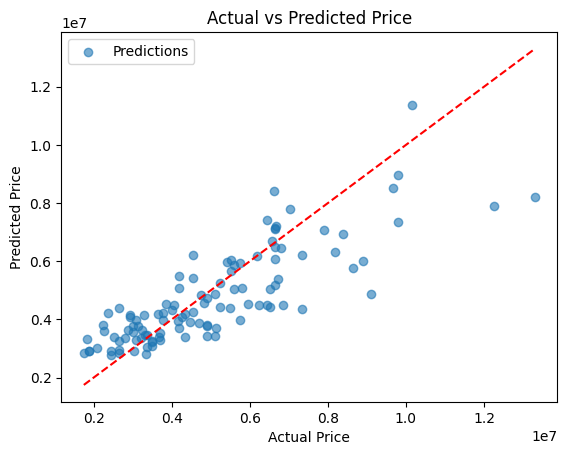

In [ ]:
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6, label='Predictions')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--')  # Line for perfect prediction
plt.legend()
plt.show()

### Interpret Coefficients

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 15.109348635023562
Coefficients: [ 0.10580161  0.01514715  0.08914808  0.07079133  0.03151646  0.11192494
  0.05395059  0.09900267  0.1300891   0.15791872  0.12572799  0.00113173
 -0.1093545 ]
